In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from xml.etree import cElementTree as ET
import re
import json
from collections import Counter
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [2]:
'''name definition'''
example = '/home/luluvyd/corpus/gutenberg-poem/gutenberg-poetry-example.ndjson'
filename = '/home/luluvyd/corpus/gutenberg-poem/gutenberg-poetry-v001.ndjson'
output = '/home/luluvyd/corpus/gutenberg-poem/gutenberg-poetry-example-articles.txt'
outputFile = '/home/luluvyd/corpus/gutenberg-poem/gutenberg-poetry-articles.txt'


In [3]:
emos = loadEmotionWords('/home/luluvyd/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [4]:
def convertFile(infile, outfile): 
    '''Convert json formatted file into line format'''
    line = infile.readline()
    article = ""
    i = 0
    pgid = -1
    out = open(outfile, "w+") 
    
    while line:
        res = json.loads(line) 
        c = res['s']
        cgid = res['gid']

        if (cgid != pgid): 
            if (len(article) > 0):
                out.write(article) 
                out.write('\n')
                article = ""
                pgid = cgid
                i += 1
            article += c + " "
            pgid = cgid
        else: 
            article += c + " "
        line = infile.readline()
        
    if (len(article) > 0): 
        out.write(article) 
    out.close() 

In [ ]:
'''
Example : convert file from json to line format
'''
with open(example, 'r', errors='replace') as f:
    convertFile(f,output)
f.close()

In [5]:
'''
Corpus : convert file from json to line format
'''
with open(filename, 'r', errors='replace') as f:
    convertFile(f,outputFile)
f.close()

In [6]:
'''
Corpus : break-up cmu movie view file
'''
scores = []
with open(outputFile, 'r', errors='replace') as f:
    r = scoreArticle(f, emos)
    scores += r

In [7]:
len(scores)

1191

In [8]:
scoresPer = np.array(scores)*100
maxScore = max(scoresPer)

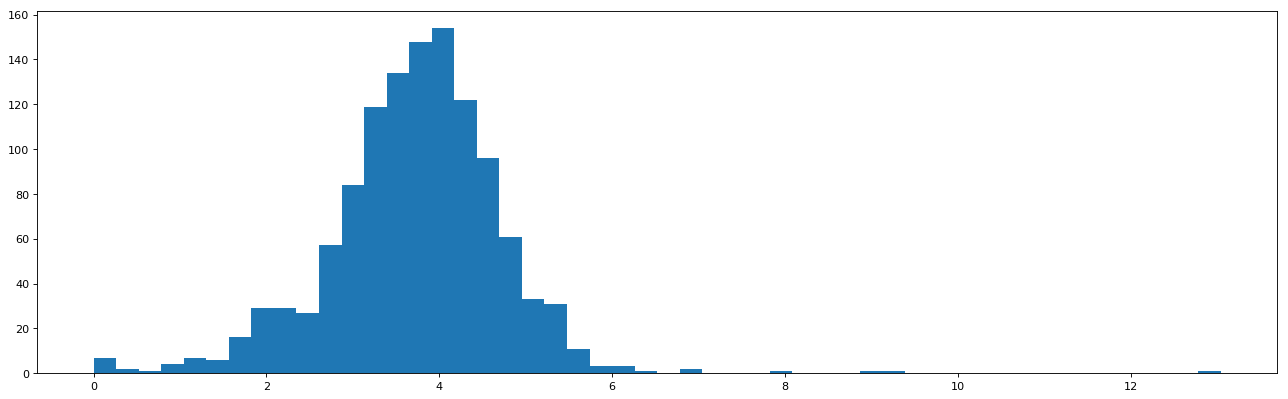

In [9]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 50
plt.hist(scoresPer,bins=n_bins)
plt.show()